In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [3]:
# Load the iris dataset
iris = datasets.load_iris()
X, y = datasets.load_iris(return_X_y=True)

In [4]:
# Split dataset into training and testing (80/20 split)
skf = StratifiedKFold(n_splits=5) 
skf.get_n_splits(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [5]:
# Extract the number of classes
num_classes = len(np.unique(y_train))

In [6]:
# Build GMM
classifier = GaussianMixture(n_components=num_classes, covariance_type='full', init_params='kmeans', max_iter=20)

In [7]:
# Initialize the GMM means
classifier.means_ = np.array([X_train[y_train == i].mean(axis=0) for i in range(num_classes)])

In [8]:
# Train the GMM classifier
classifier.fit(X_train)

GaussianMixture(max_iter=20, n_components=3)

In [9]:
# Draw boundaries
plt.figure()
colors = 'bgr'
for i, color in enumerate(colors):
# Extract eigenvalues and eigenvectors
   eigenvalues, eigenvectors = np.linalg.eigh(classifier.covariances_[i][:2, :2])

<Figure size 432x288 with 0 Axes>

In [10]:
# Normalize the first eigenvector
norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])

In [11]:
# Extract the angle of tilt
angle = np.arctan2(norm_vec[1], norm_vec[0])
angle = 180 * angle / np.pi

In [12]:
# Scaling factor to magnify the ellipses
# (random value chosen to suit our needs)
scaling_factor = 8
eigenvalues *= scaling_factor

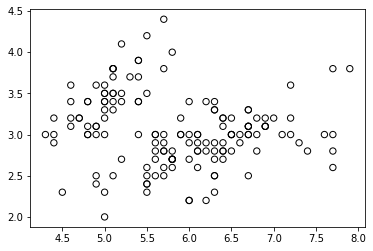

In [13]:
# Plot the data
colors = 'bgr'
for i, color in enumerate(colors):
    cur_data = iris.data[iris.target == i]
    plt.scatter(cur_data[:,0], cur_data[:,1], marker='o',facecolors='none', edgecolors='black', s=40,label=iris.target_names[i])

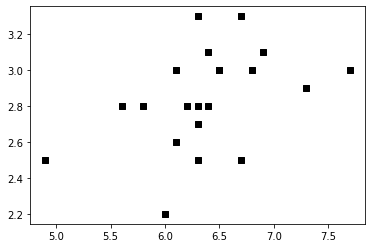

In [14]:
test_data = X_test[y_test == i]
plt.scatter(test_data[:,0], test_data[:,1], marker='s',facecolors='black', edgecolors='black', s=40 ,label=iris.target_names[i])

In [15]:
# Compute predictions for training and testing data
y_train_pred = classifier.predict(X_train)
accuracy_training = np.mean(y_train_pred.ravel() == y_train.ravel()) *100
print('Accuracy on training data =', accuracy_training)
y_test_pred = classifier.predict(X_test)
accuracy_testing = np.mean(y_test_pred.ravel() == y_test.ravel()) *100
print('Accuracy on testing data =', accuracy_testing)


Accuracy on training data = 92.22222222222223
Accuracy on testing data = 81.66666666666667
